In [2]:
import pandas as pd
import numpy as np

red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
#red.head(2)
print(red.shape)

(1599, 12)


In [4]:
#white.head(2)
print(white.shape)

(4898, 12)


In [5]:
missing_values_red = red.isnull().sum().sort_values(ascending=False)
missing_values_red.head()

quality      0
alcohol      0
sulphates    0
pH           0
density      0
dtype: int64

In [6]:
missing_values_white = white.isnull().sum().sort_values(ascending=False)
missing_values_white.head()

quality      0
alcohol      0
sulphates    0
pH           0
density      0
dtype: int64

In [7]:
review_red = pd.read_csv('winemag-data_first150k.csv')

In [8]:
review_red = review_red.drop(['country','designation','points',\
                             'price','province','region_1','region_2',\
                             'variety','winery'], axis=1)
review_red.rename(columns={'Unnamed: 0':'Number'}, inplace= True)

In [9]:
#review_red.head(2)
print(len(review_red))
red_reviews = pd.Series(review_red.description.values, index = review_red.Number).to_dict()

150930


In [10]:
red['review'] = np.random.randint(0,len(review_red),red.shape[0])

In [11]:
red['review'] = red['review'].map(red_reviews)

In [12]:
red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,"Deep and dark on the nose, with licorice, cola..."
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,"A finely balanced wine, its tannins showing th..."


In [13]:
review_white = pd.read_csv('winemag-data-130k-v2.csv')

In [14]:
review_white = review_white.drop(['country','designation','points',\
                             'price','province','region_1','region_2',\
                             'variety','winery','taster_name',\
                                 'taster_twitter_handle','title'], axis=1)
review_white.rename(columns={'Unnamed: 0':'Number'}, inplace= True)

In [15]:
print(len(review_white))
white_reviews = pd.Series(review_white.description.values, index = review_white.Number).to_dict()

129971


In [16]:
white['review'] = np.random.randint(0,len(review_white),white.shape[0])

In [17]:
white['review'] = white['review'].map(white_reviews)

In [18]:
white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,"Sharp in acidity and bone dry, this is a good,..."
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,"Aromas of tree bark, baked sugar beet, herbs a..."


In [19]:
red.to_csv("red_wine_with_review.csv")
white.to_csv("white_wine_with_review.csv")

## Red Wine

In [19]:
# fetch wordcount for each review
red['review_word_count'] = red['review'].apply(lambda x: len(str(x).split(" ")))
red[['review','review_word_count']].head(2)

,review,review_word_count
0,"Deep and dark on the nose, with licorice, cola...",62
1,"A finely balanced wine, its tannins showing th...",39


In [20]:
red.review_word_count.describe()

count    1599.000000
mean       40.223890
std        11.675789
min        11.000000
25%        32.000000
50%        39.000000
75%        47.000000
max        94.000000
Name: review_word_count, dtype: float64

In [21]:
# 10 most common words
frequency = pd.Series(' '.join(red['review']).split()).value_counts()[:10]
#frequency
# 10 most uncommon words
frequency_un = pd.Series(' '.join(red['review']).split()).value_counts()[-10:]
#frequency_un

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [29]:
import nltk
from nltk import corpus
nltk.download("stopwords")
nltk.download('wordnet') 


[nltk_data] Downloading package stopwords to /Users/ziwei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ziwei/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stop_words = stopwords.words('english')

In [31]:
corpus = []
for i in range(0, len(red)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', red['review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

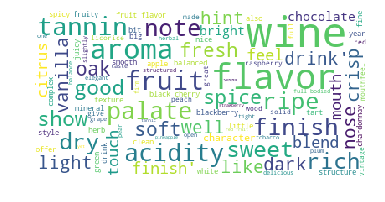

In [36]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [33]:
#cv = CountVectorizer(max_df=0.85, stop_words = stop_words, max_features=10000)
#word_count_vector = cv.fit_transform(list(red['review']))


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=5, max_features=100, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\w+', use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(red['review'])

In [39]:
features = tfidf.get_feature_names()
print(features)

['acidity', 'age', 'aging', 'apple', 'aromas', 'balance', 'balanced', 'berry', 'big', 'bit', 'black', 'blackberry', 'blend', 'bodied', 'bright', 'cabernet', 'cassis', 'character', 'chardonnay', 'cherries', 'cherry', 'chocolate', 'citrus', 'clean', 'cola', 'complex', 'creamy', 'crisp', 'dark', 'delicious', 'drink', 'dry', 'elegant', 'fine', 'finish', 'finishes', 'firm', 'flavor', 'flavors', 'fresh', 'fruit', 'fruits', 'fruity', 'good', 'great', 'green', 'juicy', 'just', 'licorice', 'light', 'like', 'little', 'long', 'medium', 'mineral', 'mouth', 'mouthfeel', 'nice', 'nose', 'notes', 'oak', 'offers', 'palate', 'peach', 'pear', 'pepper', 'pinot', 'plum', 'raspberry', 'red', 'rich', 'ripe', 's', 'sauvignon', 'shows', 'slightly', 'smoky', 'smooth', 'soft', 'solid', 'spice', 'spicy', 'structure', 'structured', 'style', 'sweet', 't', 'tannic', 'tannins', 'tart', 'texture', 'toast', 'tobacco', 'touch', 'vanilla', 'vintage', 'white', 'wine', 'wood', 'years']
